In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('sales_prediction.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df[df['Item_Weight'].isnull()].tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128


<Axes: >

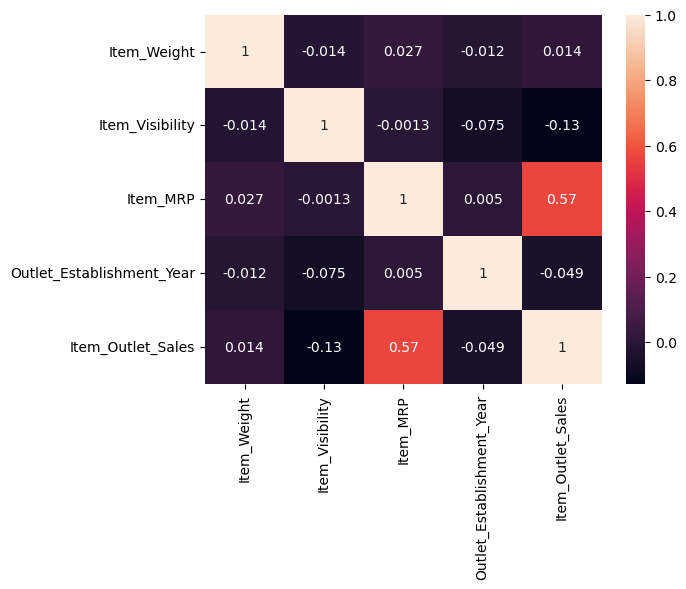

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.corr(),annot=True)

In [9]:
df[df['Outlet_Size'].isnull()].tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850


In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('reg','Regular')

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: >

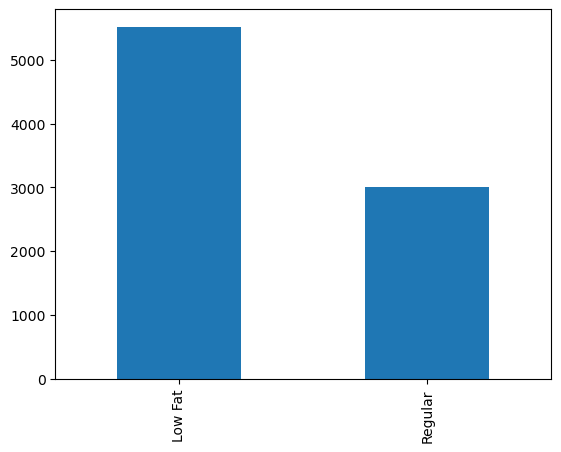

In [13]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')

In [14]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

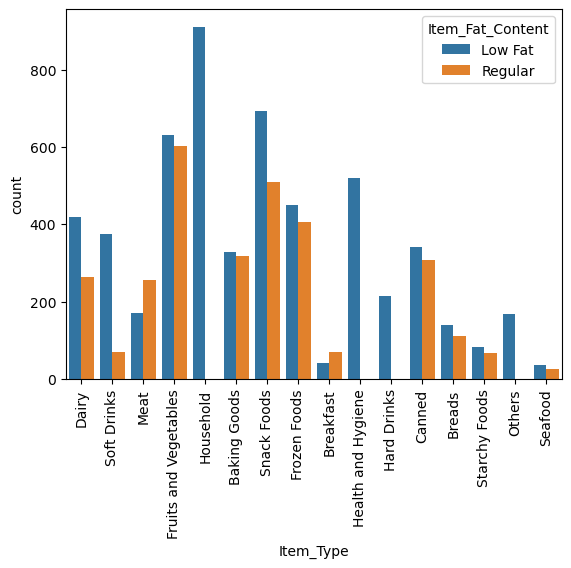

In [15]:
sns.countplot(data=df,x='Item_Type',hue='Item_Fat_Content')
plt.xticks(rotation=90)
plt.show()

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [19]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [20]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [21]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [24]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
aa=df.groupby(['Outlet_Size'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False).reset_index()
aa

,index,Outlet_Size,Item_Outlet_Sales
0,1,Medium,1.188225e+07
1,2,Small,4.566212e+06
2,0,High,2.142664e+06


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

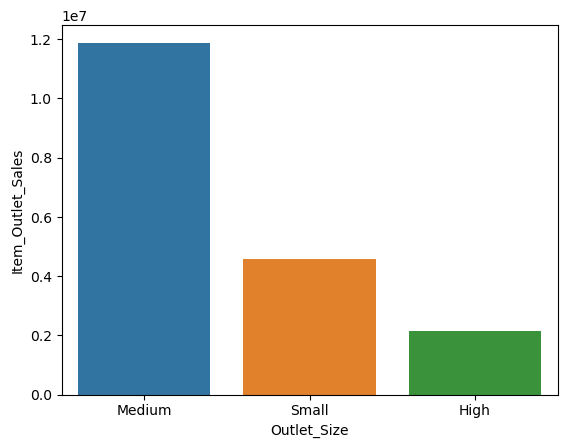

In [31]:
aa=aa[['Outlet_Size','Item_Outlet_Sales']]
sns.barplot(data=aa,x='Outlet_Size',y='Item_Outlet_Sales')

In [33]:
df['Item_Type'].nunique()

16

In [41]:
bb = df.groupby(['Item_Type'], as_index=False)['Item_MRP'].count().sort_values(by='Item_MRP', ascending=False).reset_index(drop=True).rename(columns={'Item_MRP': 'count'})
# bb=bb[['Item_Type','Item_MRP']]
bb.head()

,Item_Type,count
0,Fruits and Vegetables,1232
1,Snack Foods,1200
2,Household,910
3,Frozen Foods,856
4,Dairy,682


In [ ]:
# From these we can conclude that fruits and vegetables ca

In [42]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [44]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [48]:
df.groupby(['Outlet_Type'],as_index=False)['Item_Outlet_Sales'].count().sort_values(by='Item_Outlet_Sales',ascending=False).reset_index(drop=True).rename(columns={'Item_Outlet_Sales':'count'})

,Outlet_Type,count
0,Supermarket Type1,5577
1,Grocery Store,1083
2,Supermarket Type3,935
3,Supermarket Type2,928


In [ ]:
# From supermarket1 sales has been grow

In [49]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

<Axes: >

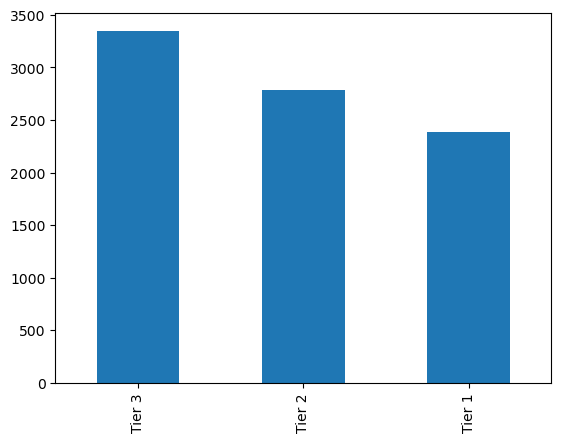

In [50]:
df['Outlet_Location_Type'].value_counts().plot(kind='bar')

In [56]:
outlet_sum=df.groupby('Outlet_Location_Type',as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False).reset_index(drop=True).rename(columns={'Item_Outlet_Sales':'sum'})
outlet_sum

,Outlet_Location_Type,sum
0,Tier 3,7.636753e+06
1,Tier 2,6.472314e+06
2,Tier 1,4.482059e+06


<Axes: xlabel='Outlet_Location_Type', ylabel='sum'>

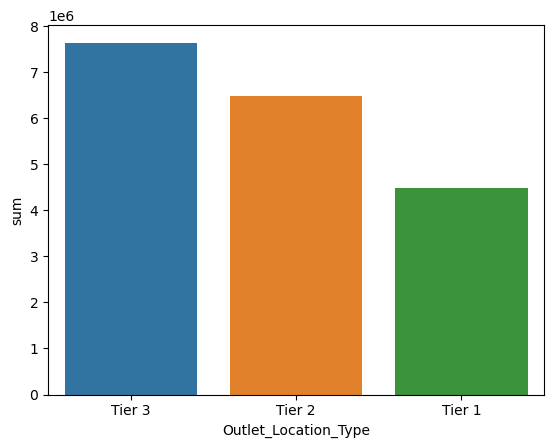

In [57]:
sns.barplot(data=outlet_sum,x='Outlet_Location_Type',y='sum')

In [58]:
# now we train the  model but the first step is that to convert categorical column into numerical columns

In [63]:
cat_columns=df.select_dtypes(include='object').columns
num_columns=df.select_dtypes(exclude='object').columns

In [64]:
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()

In [67]:
for i in cat_columns:
    df[i]=le.fit_transform(df[i])

In [68]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [70]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklear.

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt=DecisionTreeRegressor()

In [74]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [75]:
y_pred=dt.predict(X_test)

In [76]:
from sklearn.metrics import r2_score

In [77]:
print(r2_score(y_test,y_pred))

0.20026849234688526


In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf=RandomForestRegressor()

In [81]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
y_pred=rf.predict(X_test)

In [83]:
print(r2_score(y_test,y_pred))

0.563379961485861
